In [1]:
import os
import pandas as pd
import numpy as np
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\\Users\\Tobi\\Desktop\\New folder\\git\\ETL_ABMF\\ML work")

globbed_files = glob.glob("*.csv")

# globbed_files

data = []
for csv in globbed_files:
    frame = pd.read_csv(csv)
    frame['filename'] = os.path.basename(csv)
    data.append(frame)
    df = pd.concat(data)
    
df.drop(columns=['filename'], axis=1, inplace=True)    

    
# df

In [3]:
def working_time():
    working_hrs = pd.date_range('2022-09-01 08:00:00','2022-09-01 17:00:00', freq='1min')
    working_hrs.freq=None
    working_hrs.astype(str)

    working_hrs_df = pd.DataFrame(working_hrs, columns=['Time'])
    working_hrs_df['new_date'] = [d.date() for d in working_hrs_df['Time']]
    working_hrs_df['new_time'] = [d.time() for d in working_hrs_df['Time']]

    working_hrs_df.drop(columns=['Time', 'new_date'], inplace=True)

    working_times = []
    for time in working_hrs_df.new_time:
        t = time.strftime("%H:%M:%S")
        working_times.append(t)
    return working_times

# working_time()

In [63]:
len(working_time())

541

In [4]:
def reformed_df(df):
    
    df['Time']= pd.to_datetime(df['Time'])

    df['Time'] = df['Time'].dt.floor('T')

    df['Time'] = df['Time'].dt.floor('Min')

    df['new_date'] = [d.date() for d in df['Time']]
    df['new_time'] = [d.time() for d in df['Time']]
    df['new_time'] = df['new_time'].astype(str)
#     current_time_frame(df)
#     df['Time'].duplicated().any()
#     df['Time']= pd.to_datetime(df['Time'])
    df['Day_of_week']=df.Time.dt.strftime('%A')
#     df = df[~df.Day_of_week.isin(['Saturday','Sunday'])] 
#     df = df[df.new_time.isin(working_time())] 
    df = df.set_index('Time')
    df.index = pd.to_datetime(df.index)

    return(df)
# df.drop_duplicates()

df = reformed_df(df)
# df

In [ ]:
working_time()

In [7]:
print(df.index.min())
print(df.index.max())

# df = df[~df.Day_of_week.isin(['Saturday','Sunday'])] 
# df = df[df.new_time.isin(working_time())] 
# df = df.set_index('Time')
# df.index = pd.to_datetime(df.index)

2022-08-31 15:57:00
2022-09-30 18:04:00


In [ ]:
# df

In [ ]:
# list(df.new_time.astype(str))

In [ ]:
list(df.index)

In [ ]:
# # removing none working time
# df = df[~df.new_time.isin(none_working_time())]
# df = df[~df.new_time.isin(['Saturday', 'Sunday'])]
# df

In [ ]:
# print(df.index.min())
# print(df.index.max())
# time_frame = pd.date_range(df.index.min(),df.index.max(), freq='1min')
# time_frame = pd.to_datetime(time_frame)
# time_frame = list(time_frame.astype(str))
# time_frame = pd.DataFrame(time_frame, columns=['Time'])
# time_frame = reformed_df(time_frame)
# time_frame = time_frame[~time_frame.Day_of_week.isin(['Saturday','Sunday'])] 

# time_frame

In [5]:
def supposed_time_frame(df):
    time_frame = pd.date_range(df.index.min(),df.index.max(), freq='1min')
    time_frame = pd.to_datetime(time_frame)
    time_frame = list(time_frame.astype(str))
    time_frame = pd.DataFrame(time_frame, columns=['Time'])
    time_frame = reformed_df(time_frame)
    time_frame = time_frame[~time_frame.Day_of_week.isin(['Saturday','Sunday'])]
    time_frame = time_frame[time_frame.new_time.isin(working_time())] 


    return(time_frame)

sptf = supposed_time_frame(df)
# sptf

In [6]:
def powersource_function(row):
    """
    0 = grid
    1 = gen
    """
    if (row['Ps1_kW']>row['Ps2_kW']):
        return 0
    if (row['Ps2_kW']>row['Ps1_kW']):
        return 1
    return 99999

df['powersource']=df.apply(lambda row:powersource_function(row), axis=1 )

In [ ]:
# df[df['powersource']=='NaN']

In [ ]:
# list(sptf.new_time)
# sptf = sptf[~sptf.new_time.isin(none_working_time())] 
# sptf
# sptf = sptf.set_index('Time')
# sptf.index = pd.to_datetime(sptf.index)

In [ ]:
len(set(sptf.index))

In [ ]:
len(set(df.index))

In [7]:
# time frames not logged 
def not_accounted(df1,df2):
    not_accounted = [item for item in df1.index if item not in df2.index]
#     not_accounted = set(df1.index) - set(df2.index)
    return(not_accounted)

not_accounted = not_accounted(sptf,df)

In [11]:
len(sptf.index) - len(df.index)

-747

In [ ]:
# not_accounted = set(sptf.index) - set(df.index)
# not_accounted

In [12]:
len(not_accounted)

1662

In [14]:
# not_accounted

In [ ]:
# # '2022-09-05 13:35:01'
        
# df['Time']= pd.to_datetime(df['Time'])
# df = df.set_index('Time')
# df.index = pd.to_datetime(df.index)
# df

In [ ]:
# df.loc[df.index <= '2022-09-07 11:47:57']

In [ ]:
df

In [ ]:
# def powersource_function(row):
#     if (row['Ps1_kW']>row['Ps2_kW']):
#         return 'Grid'
#     if (row['Ps2_kW']>row['Ps1_kW']):
#         return 'Gen'
#     return 'None'

# df['powersource']=df.apply(lambda row:powersource_function(row), axis=1 )

In [ ]:
df[df['powersource']==99999][['Ps1_kW','Ps2_kW']]

### BEFORE

In [ ]:
# def current_time_frame(df):
    
#     df['Time']= pd.to_datetime(df['Time'])

#     times = []
#     for time in df.new_time:
#         t = time.strftime("%H:%M:%S")
#         times.append(t)
#     return(times)

# df_times = current_time_frame(df)
# df_times

In [ ]:
df

In [ ]:
# df = df.set_index('Time')
df.index = pd.to_datetime(df.index)
df = df.loc[df.index >= '2022-09-01 00:00:00']

In [ ]:
current_timestamp = df.index

In [ ]:
# df = df.set_index('Time')

In [ ]:
print(df.index.min())
print(df.index.max())

In [ ]:
# time_frame = pd.date_range(df.index.min(),df.index.max(), freq='1min')
# time_frame.freq=None

In [ ]:

# time_frame.freq=None
# time_frame

In [ ]:
# df.index

In [ ]:
# df_time_frame = df.index

In [ ]:
# len(time_frame) - len(df.index)


In [ ]:
# len(df.index) - len(time_frame)

In [ ]:
# not_accounted = set(df.index) - set(time_frame)

In [ ]:
# not_accounted.astype(str)

In [ ]:
not_accounted

In [ ]:
# df.reset_index(inplace=True)

### MODEL BUILDING

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')

### MISSING DATA FILLING (LOCF)

In [8]:
pd.set_option('display.max_rows', 1000)

In [9]:
df_ml = df.reset_index()

col_list = list(df_ml.columns)

df_ml['Time'] = df_ml['Time'].astype(str)

# df_ml = df_ml[['Time','powersource']]

# df_ml.info()
# df_ml

In [10]:
# time frames not logged 
def not_accounted(df1,df2):
    not_accounted = [item for item in df1.index if item not in df2.index]
#     not_accounted = set(df1.index) - set(df2.index)
    return(not_accounted)

not_accounted = not_accounted(sptf,df)

not_accounted= pd.to_datetime(not_accounted)

not_accounted = pd.DataFrame(not_accounted,columns=['Time'])

# not_accounted

not_accounted = reformed_df(not_accounted)
# not_accounted.reset_index()
# not_accounted['Time']=not_accounted['Time'].astype(str)
# not_accounted

# not_accounted

not_accounted = not_accounted.reset_index()

# not_accounted

In [ ]:
# not_accounted= pd.to_datetime(not_accounted)

In [ ]:
# not_accounted = pd.DataFrame(not_accounted,columns=['Time'])

In [ ]:
# not_accounted

In [ ]:
# not_accounted = reformed_df(not_accounted)
# # not_accounted.reset_index()
# # not_accounted['Time']=not_accounted['Time'].astype(str)
# # not_accounted

In [ ]:
# not_accounted

In [ ]:
# not_accounted = not_accounted.reset_index()

In [ ]:
# not_accounted

In [ ]:
# vertical_concat['Time']= pd.to_datetime(vertical_concat['Time'])

# vertical_concat.sort_values(by='Time', inplace=True)

# vertical_concat.reset_index()

In [ ]:
# not_accounted = pd.to_datetime(not_accounted)
# not_accounted = list(not_accounted.astype(str))

# not_accounted = pd.DataFrame(not_accounted,columns=col_list)
# not_accounted

In [11]:
# # not_accounted.info()

vertical_concat = pd.concat([df_ml, not_accounted], join="outer",ignore_index=True)
vertical_concat

Time  Freq_Hz     Va_V     Vb_V     Vc_V  Vnavg_V  \
0      2022-08-31 15:57:00   49.497  231.389  229.878  230.123  230.463   
1      2022-08-31 15:58:00   49.507  231.381  229.880  230.103  230.454   
2      2022-08-31 15:59:00   49.555  231.331  229.824  229.989  230.382   
3      2022-08-31 16:00:00   49.383  230.558  230.493  228.607  229.886   
4      2022-08-31 16:02:00   50.285  214.781  216.838  214.759  215.459   
...                    ...      ...      ...      ...      ...      ...   
14370  2022-09-29 16:59:00      NaN      NaN      NaN      NaN      NaN   
14371  2022-09-29 17:00:00      NaN      NaN      NaN      NaN      NaN   
14372  2022-09-30 09:17:00      NaN      NaN      NaN      NaN      NaN   
14373  2022-09-30 09:18:00      NaN      NaN      NaN      NaN      NaN   
14374  2022-09-30 09:19:00      NaN      NaN      NaN      NaN      NaN   

         Vab_V    Vbc_V    Vca_V  Vlavg_V  ...  DI3  DI4  DI5  DI6  DI7  DI8  \
0      399.895  397.910  399.837  399.214  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1      399.821  397.843  399.616  399.093  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2      399.867  397.829  399.782  399.159  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3      399.949  397.690  397.151  398.263  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4      374.367  374.400  370.412  373.060  ...  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...      ...      ...      ...  ...  ...  ...  ...  ...  ...  ...   
14370      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
14371      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
14372      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
14373      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
14374      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   

         new_date  new_time Day_of_week powersource  
0      2022-08-31  15:57:00   Wednesday         1.0  
1      2022-08-31  15:58:00   Wednesday         1.0  
2      2022-08-31  15:59:00   Wednesday         1.0  
3      2022-08-31  16:00:00   Wednesday         1.0  
4      2022-08-31  16:02:00   Wednesday         1.0  
...           ...       ...         ...         ...  
14370  2022-09-29  16:59:00    Thursday         NaN  
14371  2022-09-29  17:00:00    Thursday         NaN  
14372  2022-09-30  09:17:00      Friday         NaN  
14373  2022-09-30  09:18:00      Friday         NaN  
14374  2022-09-30  09:19:00      Friday         NaN  

[14375 rows x 268 columns]

In [12]:
# vertical_concat

vertical_concat['Time']= pd.to_datetime(vertical_concat['Time'])

vertical_concat.sort_values(by='Time', inplace=True)

# vertical_concat.reset_index()

In [13]:
vertical_concat

Time  Freq_Hz     Va_V     Vb_V     Vc_V  Vnavg_V  \
0     2022-08-31 15:57:00   49.497  231.389  229.878  230.123  230.463   
1     2022-08-31 15:58:00   49.507  231.381  229.880  230.103  230.454   
2     2022-08-31 15:59:00   49.555  231.331  229.824  229.989  230.382   
3     2022-08-31 16:00:00   49.383  230.558  230.493  228.607  229.886   
12713 2022-08-31 16:01:00      NaN      NaN      NaN      NaN      NaN   
...                   ...      ...      ...      ...      ...      ...   
12708 2022-09-30 18:00:00   50.874  230.473  231.388  231.166  231.009   
12709 2022-09-30 18:01:00   50.854  230.495  231.408  231.200  231.035   
12710 2022-09-30 18:02:00   50.793  230.496  231.425  231.202  231.041   
12711 2022-09-30 18:03:00   50.793  230.507  231.427  231.213  231.049   
12712 2022-09-30 18:04:00   50.713  230.496  231.431  231.216  231.048   

         Vab_V    Vbc_V    Vca_V  Vlavg_V  ...  DI3  DI4  DI5  DI6  DI7  DI8  \
0      399.895  397.910  399.837  399.214  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1      399.821  397.843  399.616  399.093  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2      399.867  397.829  399.782  399.159  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3      399.949  397.690  397.151  398.263  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12713      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...      ...      ...      ...  ...  ...  ...  ...  ...  ...  ...   
12708  399.669  401.097  399.282  400.016  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12709  399.688  401.003  399.313  400.001  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12710  399.629  401.025  399.373  400.009  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12711  399.739  401.155  399.488  400.127  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12712  399.374  401.137  399.443  399.985  ...  0.0  0.0  0.0  0.0  0.0  0.0   

         new_date  new_time Day_of_week powersource  
0      2022-08-31  15:57:00   Wednesday         1.0  
1      2022-08-31  15:58:00   Wednesday         1.0  
2      2022-08-31  15:59:00   Wednesday         1.0  
3      2022-08-31  16:00:00   Wednesday         1.0  
12713  2022-08-31  16:01:00   Wednesday         NaN  
...           ...       ...         ...         ...  
12708  2022-09-30  18:00:00      Friday         1.0  
12709  2022-09-30  18:01:00      Friday         1.0  
12710  2022-09-30  18:02:00      Friday         1.0  
12711  2022-09-30  18:03:00      Friday         1.0  
12712  2022-09-30  18:04:00      Friday         1.0  

[14375 rows x 268 columns]

In [14]:
not_accounted_df = vertical_concat[vertical_concat['powersource'].isna()]
not_accounted_df

Time  Freq_Hz  Va_V  Vb_V  Vc_V  Vnavg_V  Vab_V  Vbc_V  \
12713 2022-08-31 16:01:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
12714 2022-08-31 16:56:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
12715 2022-08-31 16:57:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
12716 2022-08-31 16:58:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
12717 2022-09-02 09:07:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
...                   ...      ...   ...   ...   ...      ...    ...    ...   
14370 2022-09-29 16:59:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
14371 2022-09-29 17:00:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
14372 2022-09-30 09:17:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
14373 2022-09-30 09:18:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   
14374 2022-09-30 09:19:00      NaN   NaN   NaN   NaN      NaN    NaN    NaN   

       Vca_V  Vlavg_V  ...  DI3  DI4  DI5  DI6  DI7  DI8    new_date  \
12713    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-08-31   
12714    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-08-31   
12715    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-08-31   
12716    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-08-31   
12717    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-02   
...      ...      ...  ...  ...  ...  ...  ...  ...  ...         ...   
14370    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-29   
14371    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-29   
14372    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-30   
14373    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-30   
14374    NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  2022-09-30   

       new_time Day_of_week powersource  
12713  16:01:00   Wednesday         NaN  
12714  16:56:00   Wednesday         NaN  
12715  16:57:00   Wednesday         NaN  
12716  16:58:00   Wednesday         NaN  
12717  09:07:00      Friday         NaN  
...         ...         ...         ...  
14370  16:59:00    Thursday         NaN  
14371  17:00:00    Thursday         NaN  
14372  09:17:00      Friday         NaN  
14373  09:18:00      Friday         NaN  
14374  09:19:00      Friday         NaN  

[1662 rows x 268 columns]

### Last Observation Carried Forward

In [ ]:
list(vertical_concat.columns)

In [ ]:
vertical_concat['Forward_Fill'] = vertical_concat['powersource'].ffill()
vertical_concat['Backward_Fill'] = vertical_concat['powersource'].bfill()
# # df[‘SMA’] = df['AvgTemperature'].rolling(window=5).mean()

vertical_concat['MA'] = vertical_concat['Va_V'].rolling(window=9).mean()
vertical_concat['EWA']= vertical_concat['Va_V'].ewm(halflife=4).mean()
vertical_concat['Interpolate_Spline']= vertical_concat['Va_V'].interpolate(option='spline')
vertical_concat['WMA'] = vertical_concat['Va_V'].rolling(window=9).apply(lambda x: x[::-1].cumsum().sum() * 2 / 31941  / (31941  + 1))

In [ ]:
# vertical_concat['Interpolate_Spline']= vertical_concat['DMD_P_kW'].interpolate(option='spline')

In [ ]:
# pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_rows', 1000)


In [ ]:
vertical_concat[vertical_concat['powersource'].isna()]

In [15]:
def determinant(row):
    """
    0 = grid
    1 = gen
    """
    
    vertical_concat['Forward_Fill'] = vertical_concat['powersource'].ffill()
    vertical_concat['Backward_Fill'] = vertical_concat['powersource'].bfill()
    
    if row['Backward_Fill']==row['Forward_Fill']:
        return 1
    return 0

# vertical_concat['determinant']=vertical_concat.apply(lambda row:determinant(row), axis=1 )

In [ ]:
vertical_concat.columns

In [ ]:
pd.set_option('display.max_rows', None)
vertical_concat2 = vertical_concat[vertical_concat.new_time.isin(working_time())] 
# vertical_concat2= vertical_concat[~vertical_concat.Day_of_week.isin(['Saturday','Sunday'])] 

vertical_concat2[['Time','powersource','Va_V','Interpolate_Spline', 'EWA', 'MA','determinant', 'WMA']]

### Holiday treatment

In [ ]:
# Allow for reading the grid but not for gen
# remove all constant holidays
len(vertical_concat2)

In [ ]:
vertical_concat2[vertical_concat2['powersource'].isna()]

In [ ]:
pd.set_option('display.max_rows', 1000)

### findings 1

In [16]:
# limit agument
vertical_concat['Forward_Fill'] = vertical_concat['powersource'].ffill(limit=30)
vertical_concat['Backward_Fill'] = vertical_concat['powersource'].bfill(limit=30)
# # df[‘SMA’] = df['AvgTemperature'].rolling(window=5).mean()

# vertical_concat['MA'] = vertical_concat['Va_V'].rolling(window=9).mean()
# vertical_concat['EWA']= vertical_concat['Va_V'].ewm(halflife=4).mean()
vertical_concat['Interpolate_Spline']= vertical_concat['Va_V'].interpolate(option='time')
# vertical_concat['WMA'] = vertical_concat['Va_V'].rolling(window=9).apply(lambda x: x[::-1].cumsum().sum() * 2 / 31941  / (31941  + 1))


vertical_concat['determinant']=vertical_concat.apply(lambda row:determinant(row), axis=1 )


pd.set_option('display.max_rows', 1000)
vertical_concat2 = vertical_concat[vertical_concat.new_time.isin(working_time())] 
# vertical_concat2= vertical_concat[~vertical_concat.Day_of_week.isin(['Saturday','Sunday'])] 

vertical_concat2[['Time','powersource','Va_V','Interpolate_Spline', 'Forward_Fill','Backward_Fill']]

Time  powersource     Va_V  Interpolate_Spline  \
0     2022-08-31 15:57:00          1.0  231.389            231.3890   
1     2022-08-31 15:58:00          1.0  231.381            231.3810   
2     2022-08-31 15:59:00          1.0  231.331            231.3310   
3     2022-08-31 16:00:00          1.0  230.558            230.5580   
12713 2022-08-31 16:01:00          NaN      NaN            222.6695   
...                   ...          ...      ...                 ...   
12644 2022-09-30 16:56:00          1.0  231.709            231.7090   
12645 2022-09-30 16:57:00          1.0  231.650            231.6500   
12646 2022-09-30 16:58:00          1.0  231.985            231.9850   
12647 2022-09-30 16:59:00          1.0  231.211            231.2110   
12648 2022-09-30 17:00:00          1.0  230.942            230.9420   

       Forward_Fill  Backward_Fill  
0               1.0            1.0  
1               1.0            1.0  
2               1.0            1.0  
3               1.0            1.0  
12713           1.0            1.0  
...             ...            ...  
12644           1.0            1.0  
12645           1.0            1.0  
12646           1.0            1.0  
12647           1.0            1.0  
12648           1.0            1.0  

[12057 rows x 6 columns]

In [30]:
# time interpolation
vertical_concat['Forward_Fill'] = vertical_concat['powersource'].ffill(limit=30)
# vertical_concat['Backward_Fill'] = vertical_concat['powersource'].bfill(limit=30)
# # df[‘SMA’] = df['AvgTemperature'].rolling(window=5).mean()

# vertical_concat['MA'] = vertical_concat['Va_V'].rolling(window=9).mean()
vertical_concat['EWA']= vertical_concat['Va_V'].ewm(halflife=4).mean()
vertical_concat['Interpolate_Spline']= vertical_concat['Va_V'].interpolate(option='time')
# vertical_concat['WMA'] = vertical_concat['Va_V'].rolling(window=9).apply(lambda x: x[::-1].cumsum().sum() * 2 / 31941  / (31941  + 1))


vertical_concat['determinant']=vertical_concat.apply(lambda row:determinant(row), axis=1 )


pd.set_option('display.max_rows', 1000)
vertical_concat2 = vertical_concat[vertical_concat.new_time.isin(working_time())] 
# vertical_concat2= vertical_concat[~vertical_concat.Day_of_week.isin(['Saturday','Sunday'])] 

vertical_concat2[['Time','powersource','Va_V','Interpolate_Spline','Forward_Fill']]

Time  powersource     Va_V  Interpolate_Spline  \
0     2022-08-31 15:57:00          1.0  231.389            231.3890   
1     2022-08-31 15:58:00          1.0  231.381            231.3810   
2     2022-08-31 15:59:00          1.0  231.331            231.3310   
3     2022-08-31 16:00:00          1.0  230.558            230.5580   
12713 2022-08-31 16:01:00          NaN      NaN            222.6695   
...                   ...          ...      ...                 ...   
12644 2022-09-30 16:56:00          1.0  231.709            231.7090   
12645 2022-09-30 16:57:00          1.0  231.650            231.6500   
12646 2022-09-30 16:58:00          1.0  231.985            231.9850   
12647 2022-09-30 16:59:00          1.0  231.211            231.2110   
12648 2022-09-30 17:00:00          1.0  230.942            230.9420   

       Forward_Fill  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
12713           1.0  
...             ...  
12644           1.0  
12645           1.0  
12646           1.0  
12647           1.0  
12648           1.0  

[12057 rows x 5 columns]

### FINDINGS

In [17]:
df_ml = df.reset_index()

col_list = list(df_ml.columns)

df_ml['Time'] = df_ml['Time'].astype(str)

# df_ml = df_ml[['Time','powersource']]

# time frames not logged 
def not_accounted(df1,df2):
    not_accounted = [item for item in df1.index if item not in df2.index]
#     not_accounted = set(df1.index) - set(df2.index)
    return(not_accounted)

not_accounted = not_accounted(sptf,df)

not_accounted= pd.to_datetime(not_accounted)

not_accounted = pd.DataFrame(not_accounted,columns=['Time'])

# not_accounted

not_accounted = reformed_df(not_accounted)
# not_accounted.reset_index()
# not_accounted['Time']=not_accounted['Time'].astype(str)
# not_accounted

# not_accounted

not_accounted = not_accounted.reset_index()

# not_accounted

vertical_concat = pd.concat([df_ml, not_accounted], join="outer",ignore_index=True)
vertical_concat['Time']= pd.to_datetime(vertical_concat['Time'])

vertical_concat.sort_values(by='Time', inplace=True)

df2 = vertical_concat.sort_values(by='Time', inplace=True)

vertical_concat['Forward_Fill'] = vertical_concat['powersource'].ffill(limit=30)
vertical_concat['Backward_Fill'] = vertical_concat['powersource'].bfill(limit = 30)
# # df[‘SMA’] = df['AvgTemperature'].rolling(window=5).mean()

# vertical_concat['MA'] = vertical_concat['Va_V'].rolling(window=9).mean()
# vertical_concat['EWA']= vertical_concat['Va_V'].ewm(halflife=4).mean()
vertical_concat['Interpolate_time']= vertical_concat['Va_V'].interpolate(option='time')
vertical_concat['Interpolate_linear']= vertical_concat['Va_V'].interpolate(option='linear')
vertical_concat['Interpolate_nearest']= vertical_concat['Va_V'].interpolate(option='nearest')
vertical_concat['Flag']= np.where(vertical_concat['Va_V'].isna()==True,'missing','data')

# vertical_concat['WMA'] = vertical_concat['Va_V'].rolling(window=9).apply(lambda x: x[::-1].cumsum().sum() * 2 / 31941  / (31941  + 1))

pd.set_option('display.max_rows', 1000)
vertical_concat2 = vertical_concat[vertical_concat.new_time.isin(working_time())] 
# vertical_concat2= vertical_concat[~vertical_concat.Day_of_week.isin(['Saturday','Sunday'])] 

vertical_concat2[['Time','powersource','Va_V','Forward_Fill','Backward_Fill','Interpolate_time','Interpolate_linear','Interpolate_nearest','Flag']]

Time  powersource     Va_V  Forward_Fill  Backward_Fill  \
0     2022-08-31 15:57:00          1.0  231.389           1.0            1.0   
1     2022-08-31 15:58:00          1.0  231.381           1.0            1.0   
2     2022-08-31 15:59:00          1.0  231.331           1.0            1.0   
3     2022-08-31 16:00:00          1.0  230.558           1.0            1.0   
12713 2022-08-31 16:01:00          NaN      NaN           1.0            1.0   
...                   ...          ...      ...           ...            ...   
12644 2022-09-30 16:56:00          1.0  231.709           1.0            1.0   
12645 2022-09-30 16:57:00          1.0  231.650           1.0            1.0   
12646 2022-09-30 16:58:00          1.0  231.985           1.0            1.0   
12647 2022-09-30 16:59:00          1.0  231.211           1.0            1.0   
12648 2022-09-30 17:00:00          1.0  230.942           1.0            1.0   

       Interpolate_time  Interpolate_linear  Interpolate_nearest     Flag  
0              231.3890            231.3890             231.3890     data  
1              231.3810            231.3810             231.3810     data  
2              231.3310            231.3310             231.3310     data  
3              230.5580            230.5580             230.5580     data  
12713          222.6695            222.6695             222.6695  missing  
...                 ...                 ...                  ...      ...  
12644          231.7090            231.7090             231.7090     data  
12645          231.6500            231.6500             231.6500     data  
12646          231.9850            231.9850             231.9850     data  
12647          231.2110            231.2110             231.2110     data  
12648          230.9420            230.9420             230.9420     data  

[12057 rows x 9 columns]

In [ ]:
# !pip install download

In [77]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
import plotly.express as px

mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

fig = px.line(vertical_concat2, x = 'Time', y='Va_V',title='Va_V')

fig.update_xaxes(
                rangeslider_visible=True,
                rangeselector = dict(
                                    buttons = list([
                                        dict(count=1, label="1y", step="year", stepmode = "backward"),
                                        dict(step='all')
                                    ]))
                )

In [34]:
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

fig = px.line(vertical_concat2, x = 'Time', y='Interpolate_time',title='Va_V')

fig.update_xaxes(
                rangeslider_visible=True,
                rangeselector = dict(
                                    buttons = list([
                                        dict(count=1, label="1y", step="year", stepmode = "backward"),
                                        dict(step='all')
                                    ]))
                )

In [ ]:
# vertical_concat

### ML MODEL

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [19]:
not_accounted_time = reformed_df(not_accounted_df)
not_accounted_time.drop(columns=not_accounted_time.columns, inplace = True)
# not_accounted_time = not_accounted_time[['Va_V']]
# not_accounted_time = not_accounted_df[['Time']]
# not_accounted_time = not_accounted_time.set_index('Time')
# not_accounted_time.index = pd.to_datetime(df.index)
# not_accounted_time

In [20]:
not_accounted_time

Empty DataFrame
Columns: []
Index: [2022-08-31 16:01:00, 2022-08-31 16:56:00, 2022-08-31 16:57:00, 2022-08-31 16:58:00, 2022-09-02 09:07:00, 2022-09-02 09:08:00, 2022-09-02 12:23:00, 2022-09-05 08:34:00, 2022-09-05 12:22:00, 2022-09-05 12:23:00, 2022-09-05 13:48:00, 2022-09-05 14:14:00, 2022-09-05 17:00:00, 2022-09-06 08:00:00, 2022-09-06 08:01:00, 2022-09-06 08:02:00, 2022-09-06 08:03:00, 2022-09-06 08:04:00, 2022-09-06 08:05:00, 2022-09-06 08:06:00, 2022-09-06 08:07:00, 2022-09-06 08:08:00, 2022-09-06 08:09:00, 2022-09-06 08:10:00, 2022-09-06 08:11:00, 2022-09-06 08:12:00, 2022-09-06 08:13:00, 2022-09-06 08:14:00, 2022-09-06 08:15:00, 2022-09-06 08:16:00, 2022-09-06 08:17:00, 2022-09-06 08:18:00, 2022-09-06 08:19:00, 2022-09-06 08:20:00, 2022-09-06 08:21:00, 2022-09-06 08:22:00, 2022-09-06 08:23:00, 2022-09-06 08:24:00, 2022-09-06 08:25:00, 2022-09-06 08:26:00, 2022-09-06 08:27:00, 2022-09-06 08:28:00, 2022-09-06 08:29:00, 2022-09-06 08:30:00, 2022-09-06 08:31:00, 2022-09-06 08:32:00, 2022-09-06 08:33:00, 2022-09-06 08:34:00, 2022-09-06 08:35:00, 2022-09-06 08:36:00, 2022-09-06 08:37:00, 2022-09-06 08:38:00, 2022-09-06 08:39:00, 2022-09-06 08:40:00, 2022-09-06 08:41:00, 2022-09-06 08:42:00, 2022-09-06 08:43:00, 2022-09-06 08:44:00, 2022-09-06 08:45:00, 2022-09-06 08:46:00, 2022-09-06 08:47:00, 2022-09-06 08:48:00, 2022-09-06 08:49:00, 2022-09-06 08:50:00, 2022-09-06 08:51:00, 2022-09-06 08:52:00, 2022-09-06 08:53:00, 2022-09-06 08:54:00, 2022-09-06 08:55:00, 2022-09-06 14:53:00, 2022-09-07 08:00:00, 2022-09-07 08:01:00, 2022-09-07 08:02:00, 2022-09-07 08:03:00, 2022-09-07 08:04:00, 2022-09-07 08:05:00, 2022-09-07 08:06:00, 2022-09-07 08:07:00, 2022-09-07 08:08:00, 2022-09-07 08:09:00, 2022-09-07 08:10:00, 2022-09-07 08:11:00, 2022-09-07 08:12:00, 2022-09-07 08:13:00, 2022-09-07 08:14:00, 2022-09-07 08:15:00, 2022-09-07 08:16:00, 2022-09-07 08:17:00, 2022-09-07 08:18:00, 2022-09-07 08:19:00, 2022-09-07 08:20:00, 2022-09-07 08:21:00, 2022-09-07 08:22:00, 2022-09-07 08:23:00, 2022-09-07 08:24:00, 2022-09-07 08:25:00, 2022-09-07 08:26:00, 2022-09-07 08:27:00, 2022-09-07 08:28:00, 2022-09-07 08:29:00, ...]

[1662 rows x 0 columns]

In [21]:
df.index = pd.to_datetime(df.index)

In [22]:
df

Freq_Hz     Va_V     Vb_V     Vc_V  Vnavg_V    Vab_V  \
Time                                                                        
2022-08-31 15:57:00   49.497  231.389  229.878  230.123  230.463  399.895   
2022-08-31 15:58:00   49.507  231.381  229.880  230.103  230.454  399.821   
2022-08-31 15:59:00   49.555  231.331  229.824  229.989  230.382  399.867   
2022-08-31 16:00:00   49.383  230.558  230.493  228.607  229.886  399.949   
2022-08-31 16:02:00   50.285  214.781  216.838  214.759  215.459  374.367   
...                      ...      ...      ...      ...      ...      ...   
2022-09-30 18:00:00   50.874  230.473  231.388  231.166  231.009  399.669   
2022-09-30 18:01:00   50.854  230.495  231.408  231.200  231.035  399.688   
2022-09-30 18:02:00   50.793  230.496  231.425  231.202  231.041  399.629   
2022-09-30 18:03:00   50.793  230.507  231.427  231.213  231.049  399.739   
2022-09-30 18:04:00   50.713  230.496  231.431  231.216  231.048  399.374   

                       Vbc_V    Vca_V  Vlavg_V    Ia_A  ...  DI3  DI4  DI5  \
Time                                                    ...                  
2022-08-31 15:57:00  397.910  399.837  399.214  15.779  ...  0.0  0.0  0.0   
2022-08-31 15:58:00  397.843  399.616  399.093  15.700  ...  0.0  0.0  0.0   
2022-08-31 15:59:00  397.829  399.782  399.159  15.696  ...  0.0  0.0  0.0   
2022-08-31 16:00:00  397.690  397.151  398.263  15.561  ...  0.0  0.0  0.0   
2022-08-31 16:02:00  374.400  370.412  373.060   3.263  ...  0.0  0.0  0.0   
...                      ...      ...      ...     ...  ...  ...  ...  ...   
2022-09-30 18:00:00  401.097  399.282  400.016   0.835  ...  0.0  0.0  0.0   
2022-09-30 18:01:00  401.003  399.313  400.001   0.833  ...  0.0  0.0  0.0   
2022-09-30 18:02:00  401.025  399.373  400.009   0.829  ...  0.0  0.0  0.0   
2022-09-30 18:03:00  401.155  399.488  400.127   0.833  ...  0.0  0.0  0.0   
2022-09-30 18:04:00  401.137  399.443  399.985   0.835  ...  0.0  0.0  0.0   

                     DI6  DI7  DI8    new_date  new_time Day_of_week  \
Time                                                                   
2022-08-31 15:57:00  0.0  0.0  0.0  2022-08-31  15:57:00   Wednesday   
2022-08-31 15:58:00  0.0  0.0  0.0  2022-08-31  15:58:00   Wednesday   
2022-08-31 15:59:00  0.0  0.0  0.0  2022-08-31  15:59:00   Wednesday   
2022-08-31 16:00:00  0.0  0.0  0.0  2022-08-31  16:00:00   Wednesday   
2022-08-31 16:02:00  0.0  0.0  0.0  2022-08-31  16:02:00   Wednesday   
...                  ...  ...  ...         ...       ...         ...   
2022-09-30 18:00:00  0.0  0.0  0.0  2022-09-30  18:00:00      Friday   
2022-09-30 18:01:00  0.0  0.0  0.0  2022-09-30  18:01:00      Friday   
2022-09-30 18:02:00  0.0  0.0  0.0  2022-09-30  18:02:00      Friday   
2022-09-30 18:03:00  0.0  0.0  0.0  2022-09-30  18:03:00      Friday   
2022-09-30 18:04:00  0.0  0.0  0.0  2022-09-30  18:04:00      Friday   

                    powersource  
Time                             
2022-08-31 15:57:00           1  
2022-08-31 15:58:00           1  
2022-08-31 15:59:00           1  
2022-08-31 16:00:00           1  
2022-08-31 16:02:00           1  
...                         ...  
2022-09-30 18:00:00           1  
2022-09-30 18:01:00           1  
2022-09-30 18:02:00           1  
2022-09-30 18:03:00           1  
2022-09-30 18:04:00           1  

[12713 rows x 267 columns]

In [23]:
df2 = df[['Va_V']]
df2

Va_V
Time                        
2022-08-31 15:57:00  231.389
2022-08-31 15:58:00  231.381
2022-08-31 15:59:00  231.331
2022-08-31 16:00:00  230.558
2022-08-31 16:02:00  214.781
...                      ...
2022-09-30 18:00:00  230.473
2022-09-30 18:01:00  230.495
2022-09-30 18:02:00  230.496
2022-09-30 18:03:00  230.507
2022-09-30 18:04:00  230.496

[12713 rows x 1 columns]

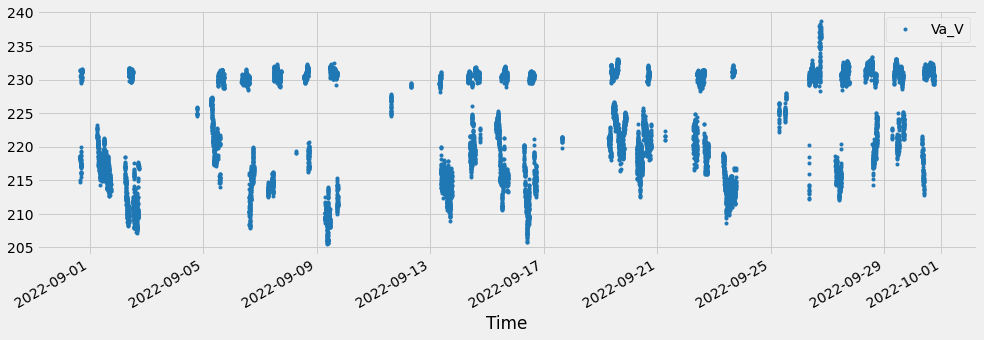

In [24]:
df2.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='')
plt.show()

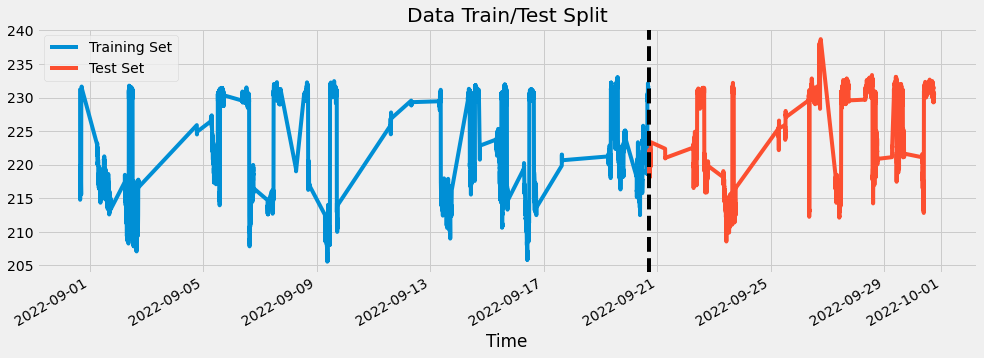

In [25]:
train = df2.loc[df.index < '2022-09-20 17:00:00']
test = df2.loc[df.index >= '2022-09-20 17:00:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-09-20 17:00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


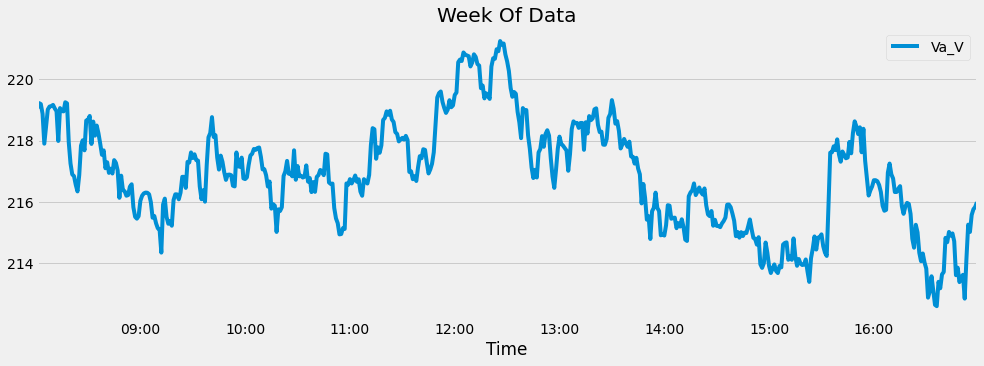

In [26]:
df2.loc[(df2.index > '2022-09-01 08:00:00') & (df2.index < '2022-09-1 17:00:00')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [27]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df2 = create_features(df2)
not_accounted_time = create_features(not_accounted_time)

In [28]:
df2

Va_V  hour  minute  dayofweek  quarter  month  year  \
Time                                                                          
2022-08-31 15:57:00  231.389    15      57          2        3      8  2022   
2022-08-31 15:58:00  231.381    15      58          2        3      8  2022   
2022-08-31 15:59:00  231.331    15      59          2        3      8  2022   
2022-08-31 16:00:00  230.558    16       0          2        3      8  2022   
2022-08-31 16:02:00  214.781    16       2          2        3      8  2022   
...                      ...   ...     ...        ...      ...    ...   ...   
2022-09-30 18:00:00  230.473    18       0          4        3      9  2022   
2022-09-30 18:01:00  230.495    18       1          4        3      9  2022   
2022-09-30 18:02:00  230.496    18       2          4        3      9  2022   
2022-09-30 18:03:00  230.507    18       3          4        3      9  2022   
2022-09-30 18:04:00  230.496    18       4          4        3      9  2022   

                     dayofyear  dayofmonth  weekofyear  
Time                                                    
2022-08-31 15:57:00        243          31          35  
2022-08-31 15:58:00        243          31          35  
2022-08-31 15:59:00        243          31          35  
2022-08-31 16:00:00        243          31          35  
2022-08-31 16:02:00        243          31          35  
...                        ...         ...         ...  
2022-09-30 18:00:00        273          30          39  
2022-09-30 18:01:00        273          30          39  
2022-09-30 18:02:00        273          30          39  
2022-09-30 18:03:00        273          30          39  
2022-09-30 18:04:00        273          30          39  

[12713 rows x 10 columns]

In [29]:
not_accounted_time

hour  minute  dayofweek  quarter  month  year  dayofyear  \
Time                                                                            
2022-08-31 16:01:00    16       1          2        3      8  2022        243   
2022-08-31 16:56:00    16      56          2        3      8  2022        243   
2022-08-31 16:57:00    16      57          2        3      8  2022        243   
2022-08-31 16:58:00    16      58          2        3      8  2022        243   
2022-09-02 09:07:00     9       7          4        3      9  2022        245   
...                   ...     ...        ...      ...    ...   ...        ...   
2022-09-29 16:59:00    16      59          3        3      9  2022        272   
2022-09-29 17:00:00    17       0          3        3      9  2022        272   
2022-09-30 09:17:00     9      17          4        3      9  2022        273   
2022-09-30 09:18:00     9      18          4        3      9  2022        273   
2022-09-30 09:19:00     9      19          4        3      9  2022        273   

                     dayofmonth  weekofyear  
Time                                         
2022-08-31 16:01:00          31          35  
2022-08-31 16:56:00          31          35  
2022-08-31 16:57:00          31          35  
2022-08-31 16:58:00          31          35  
2022-09-02 09:07:00           2          35  
...                         ...         ...  
2022-09-29 16:59:00          29          39  
2022-09-29 17:00:00          29          39  
2022-09-30 09:17:00          30          39  
2022-09-30 09:18:00          30          39  
2022-09-30 09:19:00          30          39  

[1662 rows x 9 columns]

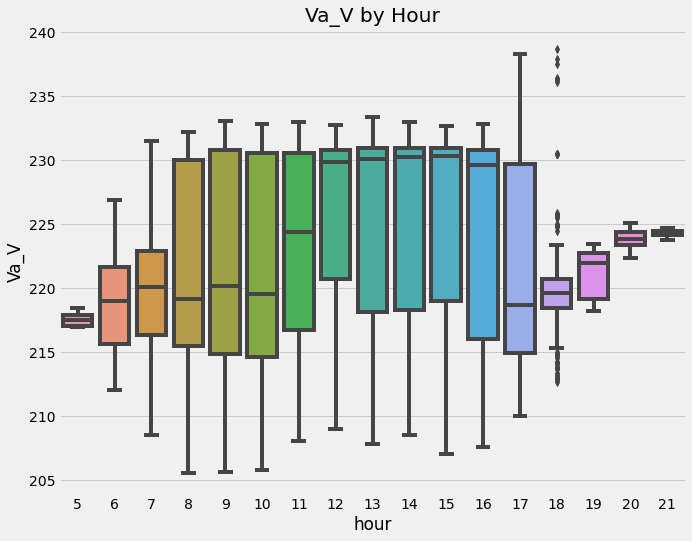

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df2, x='hour', y='Va_V')
ax.set_title('Va_V by Hour')
plt.show()

In [39]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'minute','dayofweek', 'quarter', 'month', 'year']
TARGET = 'Va_V'

X_train = train[FEATURES]
y_train = train[TARGET]

X_not_accounted_time=not_accounted_time[FEATURES]

X_test = test[FEATURES]
y_test = test[TARGET]

In [33]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=1000)

[20:53:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:219.17724	validation_1-rmse:222.92366
[924]	validation_0-rmse:4.56543	validation_1-rmse:7.88615


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

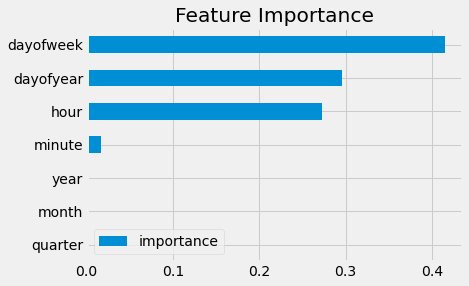

In [34]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [40]:
X_test

dayofyear  hour  minute  dayofweek  quarter  month  year
Time                                                                         
2022-09-20 17:00:00        263    17       0          1        3      9  2022
2022-09-20 17:01:00        263    17       1          1        3      9  2022
2022-09-20 17:02:00        263    17       2          1        3      9  2022
2022-09-20 17:03:00        263    17       3          1        3      9  2022
2022-09-20 17:04:00        263    17       4          1        3      9  2022
...                        ...   ...     ...        ...      ...    ...   ...
2022-09-30 18:00:00        273    18       0          4        3      9  2022
2022-09-30 18:01:00        273    18       1          4        3      9  2022
2022-09-30 18:02:00        273    18       2          4        3      9  2022
2022-09-30 18:03:00        273    18       3          4        3      9  2022
2022-09-30 18:04:00        273    18       4          4        3      9  2022

[4604 rows x 7 columns]

In [41]:
X_not_accounted_time

dayofyear  hour  minute  dayofweek  quarter  month  year
Time                                                                         
2022-08-31 16:01:00        243    16       1          2        3      8  2022
2022-08-31 16:56:00        243    16      56          2        3      8  2022
2022-08-31 16:57:00        243    16      57          2        3      8  2022
2022-08-31 16:58:00        243    16      58          2        3      8  2022
2022-09-02 09:07:00        245     9       7          4        3      9  2022
...                        ...   ...     ...        ...      ...    ...   ...
2022-09-29 16:59:00        272    16      59          3        3      9  2022
2022-09-29 17:00:00        272    17       0          3        3      9  2022
2022-09-30 09:17:00        273     9      17          4        3      9  2022
2022-09-30 09:18:00        273     9      18          4        3      9  2022
2022-09-30 09:19:00        273     9      19          4        3      9  2022

[1662 rows x 7 columns]

In [49]:
not_accounted_time.drop(columns=['prediction'],inplace=True)

In [50]:
not_accounted_time['Va_V'] = reg.predict(X_not_accounted_time)

In [54]:
not_accounted_pred = not_accounted_time[['Va_V']]

In [52]:
df

Freq_Hz     Va_V     Vb_V     Vc_V  Vnavg_V    Vab_V  \
Time                                                                        
2022-08-31 15:57:00   49.497  231.389  229.878  230.123  230.463  399.895   
2022-08-31 15:58:00   49.507  231.381  229.880  230.103  230.454  399.821   
2022-08-31 15:59:00   49.555  231.331  229.824  229.989  230.382  399.867   
2022-08-31 16:00:00   49.383  230.558  230.493  228.607  229.886  399.949   
2022-08-31 16:02:00   50.285  214.781  216.838  214.759  215.459  374.367   
...                      ...      ...      ...      ...      ...      ...   
2022-09-30 18:00:00   50.874  230.473  231.388  231.166  231.009  399.669   
2022-09-30 18:01:00   50.854  230.495  231.408  231.200  231.035  399.688   
2022-09-30 18:02:00   50.793  230.496  231.425  231.202  231.041  399.629   
2022-09-30 18:03:00   50.793  230.507  231.427  231.213  231.049  399.739   
2022-09-30 18:04:00   50.713  230.496  231.431  231.216  231.048  399.374   

                       Vbc_V    Vca_V  Vlavg_V    Ia_A  ...  DI3  DI4  DI5  \
Time                                                    ...                  
2022-08-31 15:57:00  397.910  399.837  399.214  15.779  ...  0.0  0.0  0.0   
2022-08-31 15:58:00  397.843  399.616  399.093  15.700  ...  0.0  0.0  0.0   
2022-08-31 15:59:00  397.829  399.782  399.159  15.696  ...  0.0  0.0  0.0   
2022-08-31 16:00:00  397.690  397.151  398.263  15.561  ...  0.0  0.0  0.0   
2022-08-31 16:02:00  374.400  370.412  373.060   3.263  ...  0.0  0.0  0.0   
...                      ...      ...      ...     ...  ...  ...  ...  ...   
2022-09-30 18:00:00  401.097  399.282  400.016   0.835  ...  0.0  0.0  0.0   
2022-09-30 18:01:00  401.003  399.313  400.001   0.833  ...  0.0  0.0  0.0   
2022-09-30 18:02:00  401.025  399.373  400.009   0.829  ...  0.0  0.0  0.0   
2022-09-30 18:03:00  401.155  399.488  400.127   0.833  ...  0.0  0.0  0.0   
2022-09-30 18:04:00  401.137  399.443  399.985   0.835  ...  0.0  0.0  0.0   

                     DI6  DI7  DI8    new_date  new_time Day_of_week  \
Time                                                                   
2022-08-31 15:57:00  0.0  0.0  0.0  2022-08-31  15:57:00   Wednesday   
2022-08-31 15:58:00  0.0  0.0  0.0  2022-08-31  15:58:00   Wednesday   
2022-08-31 15:59:00  0.0  0.0  0.0  2022-08-31  15:59:00   Wednesday   
2022-08-31 16:00:00  0.0  0.0  0.0  2022-08-31  16:00:00   Wednesday   
2022-08-31 16:02:00  0.0  0.0  0.0  2022-08-31  16:02:00   Wednesday   
...                  ...  ...  ...         ...       ...         ...   
2022-09-30 18:00:00  0.0  0.0  0.0  2022-09-30  18:00:00      Friday   
2022-09-30 18:01:00  0.0  0.0  0.0  2022-09-30  18:01:00      Friday   
2022-09-30 18:02:00  0.0  0.0  0.0  2022-09-30  18:02:00      Friday   
2022-09-30 18:03:00  0.0  0.0  0.0  2022-09-30  18:03:00      Friday   
2022-09-30 18:04:00  0.0  0.0  0.0  2022-09-30  18:04:00      Friday   

                    powersource  
Time                             
2022-08-31 15:57:00           1  
2022-08-31 15:58:00           1  
2022-08-31 15:59:00           1  
2022-08-31 16:00:00           1  
2022-08-31 16:02:00           1  
...                         ...  
2022-09-30 18:00:00           1  
2022-09-30 18:01:00           1  
2022-09-30 18:02:00           1  
2022-09-30 18:03:00           1  
2022-09-30 18:04:00           1  

[12713 rows x 267 columns]

In [60]:
vertical_concat_ml = pd.concat([df, not_accounted_pred], join="outer")

vertical_concat_ml = vertical_concat_ml.reset_index()

# col_list = list(df_ml.columns)

vertical_concat_ml['Time'] = vertical_concat_ml['Time'].astype(str)


vertical_concat_ml['Time']= pd.to_datetime(vertical_concat_ml['Time'])

vertical_concat_ml.sort_values(by='Time', inplace=True)
vertical_concat_ml

Time  Freq_Hz       Va_V     Vb_V     Vc_V  Vnavg_V  \
0     2022-08-31 15:57:00   49.497  231.38900  229.878  230.123  230.463   
1     2022-08-31 15:58:00   49.507  231.38100  229.880  230.103  230.454   
2     2022-08-31 15:59:00   49.555  231.33100  229.824  229.989  230.382   
3     2022-08-31 16:00:00   49.383  230.55800  230.493  228.607  229.886   
12713 2022-08-31 16:01:00      NaN  218.01442      NaN      NaN      NaN   
...                   ...      ...        ...      ...      ...      ...   
12708 2022-09-30 18:00:00   50.874  230.47300  231.388  231.166  231.009   
12709 2022-09-30 18:01:00   50.854  230.49500  231.408  231.200  231.035   
12710 2022-09-30 18:02:00   50.793  230.49600  231.425  231.202  231.041   
12711 2022-09-30 18:03:00   50.793  230.50700  231.427  231.213  231.049   
12712 2022-09-30 18:04:00   50.713  230.49600  231.431  231.216  231.048   

         Vab_V    Vbc_V    Vca_V  Vlavg_V  ...  DI3  DI4  DI5  DI6  DI7  DI8  \
0      399.895  397.910  399.837  399.214  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1      399.821  397.843  399.616  399.093  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2      399.867  397.829  399.782  399.159  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3      399.949  397.690  397.151  398.263  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12713      NaN      NaN      NaN      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...      ...      ...      ...  ...  ...  ...  ...  ...  ...  ...   
12708  399.669  401.097  399.282  400.016  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12709  399.688  401.003  399.313  400.001  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12710  399.629  401.025  399.373  400.009  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12711  399.739  401.155  399.488  400.127  ...  0.0  0.0  0.0  0.0  0.0  0.0   
12712  399.374  401.137  399.443  399.985  ...  0.0  0.0  0.0  0.0  0.0  0.0   

         new_date  new_time Day_of_week powersource  
0      2022-08-31  15:57:00   Wednesday         1.0  
1      2022-08-31  15:58:00   Wednesday         1.0  
2      2022-08-31  15:59:00   Wednesday         1.0  
3      2022-08-31  16:00:00   Wednesday         1.0  
12713         NaN       NaN         NaN         NaN  
...           ...       ...         ...         ...  
12708  2022-09-30  18:00:00      Friday         1.0  
12709  2022-09-30  18:01:00      Friday         1.0  
12710  2022-09-30  18:02:00      Friday         1.0  
12711  2022-09-30  18:03:00      Friday         1.0  
12712  2022-09-30  18:04:00      Friday         1.0  

[14375 rows x 268 columns]

In [ ]:
# test['prediction'] = reg.predict(X_test)
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# ax = df[['Va_V']].plot(figsize=(15, 5))
# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['Truth Data', 'Predictions'])
# ax.set_title('Raw Dat and Prediction')
# plt.show()

In [ ]:
# ax = df.loc[(df.index > '2022-09-20 08:00:00') & (df.index < '2022-09-20 17:00:00')]['Va_V'] \
#     .plot(figsize=(15, 5), title='A Day Of Data')
# df.loc[(df.index > '2022-09-20 08:00:00') & (df.index < '2022-09-20 17:00:00')]['prediction'] \
#     .plot(style='.')
# plt.legend(['Truth Data','Prediction'])
# plt.show()

In [ ]:
# df[(df.index > '2022-09-20 08:00:00') & (df.index < '2022-09-20 17:00:00')]['prediction']

In [ ]:
# score = np.sqrt(mean_squared_error(test['Va_V'], test['prediction']))
# print(f'RMSE Score on Test set: {score:0.2f}')

In [ ]:
# test['error'] = np.abs(test[TARGET] - test['prediction'])
# test['date'] = test.index.date
# test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

In [64]:
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

fig = px.line(vertical_concat2, x = 'Time', y='Va_V',title='Va_V')

fig.update_xaxes(
                rangeslider_visible=True,
                rangeselector = dict(
                                    buttons = list([
                                        dict(count=1, label="1y", step="year", stepmode = "backward"),
                                        dict(step='all')
                                    ]))
                )

In [63]:
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

fig = px.line(vertical_concat_ml, x = 'Time', y='Va_V',title='Va_V')

fig.update_xaxes(
                rangeslider_visible=True,
                rangeselector = dict(
                                    buttons = list([
                                        dict(count=1, label="1y", step="year", stepmode = "backward"),
                                        dict(step='all')
                                    ]))
                )

In [62]:
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False

fig = px.line(vertical_concat2, x = 'Time', y='Interpolate_time',title='Va_V')

fig.update_xaxes(
                rangeslider_visible=True,
                rangeselector = dict(
                                    buttons = list([
                                        dict(count=1, label="1y", step="year", stepmode = "backward"),
                                        dict(step='all')
                                    ]))
                )